In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## DATA OVERVIEW

In [14]:
# Train data
train_df = pd.read_csv("data/bank-data.csv", sep=';')

In [24]:
# Test data
# %10 test and %90 train data
train_df, test_df = train_test_split(train_df, test_size=0.10, random_state=42)

In [21]:
train_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
18148,51,housemaid,married,primary,no,0,yes,no,telephone,30,jul,191,3,-1,0,unknown,no
38782,26,admin.,single,secondary,no,141,yes,no,cellular,18,may,19,4,349,6,other,no
26759,32,blue-collar,single,secondary,no,2696,yes,no,cellular,20,nov,564,2,183,1,failure,no
36140,59,services,married,secondary,no,33,yes,no,cellular,11,may,138,1,-1,0,unknown,no
41212,60,housemaid,divorced,secondary,no,2063,no,no,cellular,21,aug,54,5,86,3,failure,no
20579,52,technician,divorced,secondary,no,106,no,no,cellular,12,aug,193,4,-1,0,unknown,no
25259,38,management,divorced,unknown,no,0,yes,no,cellular,18,nov,96,2,-1,0,unknown,no
41675,47,management,married,tertiary,no,288,no,no,cellular,1,oct,101,1,-1,0,unknown,yes
30933,31,unemployed,single,tertiary,no,381,yes,no,cellular,9,feb,42,2,-1,0,unknown,no
19843,34,management,married,tertiary,no,1352,no,no,cellular,8,aug,265,2,-1,0,unknown,no


In [22]:
test_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
16627,33,management,married,tertiary,no,4,yes,yes,cellular,24,jul,604,1,-1,0,unknown,no
5770,32,technician,divorced,secondary,no,18,no,no,unknown,26,may,52,1,-1,0,unknown,no
27010,38,management,single,tertiary,no,8669,yes,no,telephone,21,nov,228,6,-1,0,unknown,no
24004,37,technician,married,secondary,no,449,yes,no,cellular,29,aug,59,4,-1,0,unknown,no
38105,28,entrepreneur,married,tertiary,no,1900,yes,no,cellular,15,may,9,6,-1,0,unknown,no
31148,37,technician,single,secondary,no,1130,no,no,cellular,26,feb,152,1,-1,0,unknown,yes
5042,30,services,married,secondary,no,702,yes,no,unknown,21,may,573,1,-1,0,unknown,no
5457,49,blue-collar,married,primary,no,3767,yes,no,unknown,23,may,493,13,-1,0,unknown,no
15286,40,entrepreneur,divorced,secondary,no,2998,yes,no,cellular,18,jul,623,3,-1,0,unknown,yes
17377,36,entrepreneur,married,secondary,no,229,yes,no,cellular,28,jul,258,2,-1,0,unknown,no


### Age Distribution

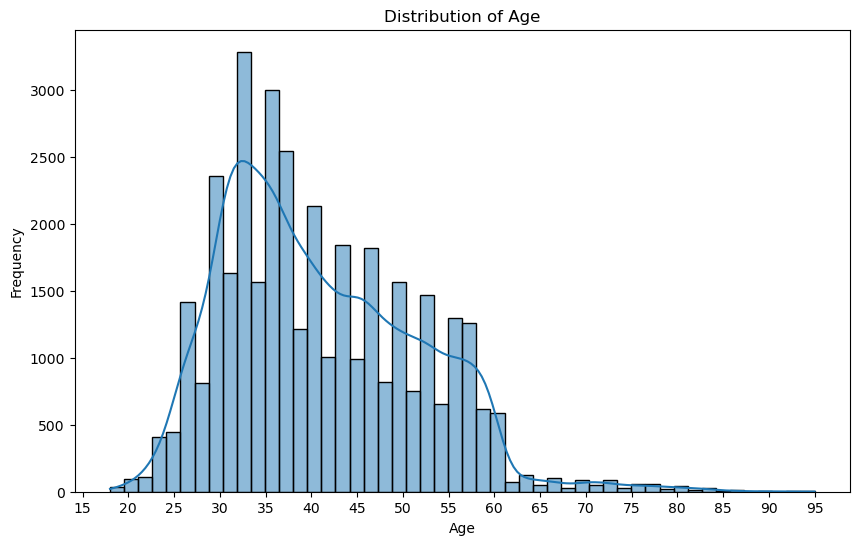

In [45]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(train_df['age'], bins=50, kde=True)

# Add labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks([i for i in range(15, 100, 5)])

# Show the plot
plt.show()

- The age group that appears most frequently is between 30 and 47 years old.








### Job Categories
The job or employment status of the customer.

In [37]:
train_df['job'] = train_df['job'].replace('unknown', 'others')
train_df['job'].value_counts()

test_df['job'] = test_df['job'].replace('unknown', 'others')
test_df['job'].value_counts()

job
blue-collar      908
management       789
technician       672
admin.           503
services         388
retired          192
self-employed    143
entrepreneur     140
unemployed       110
housemaid        108
student           96
others            20
Name: count, dtype: int64

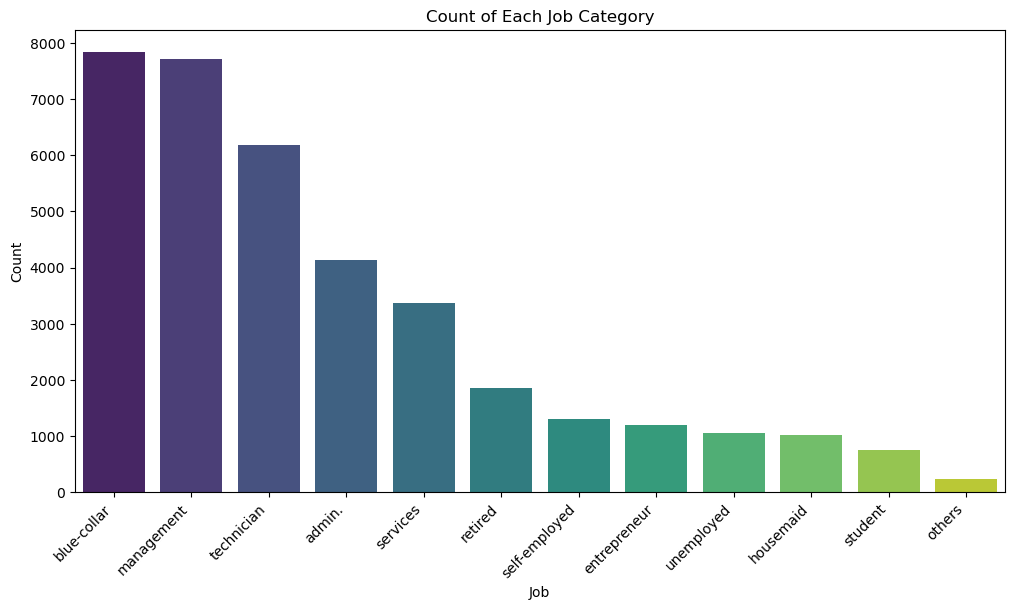

In [38]:
# Define counts
job_counts = train_df['job'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=job_counts.index, y=job_counts.values,palette='viridis')

# Add labels and title
plt.title('Count of Each Job Category')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### Marital Status

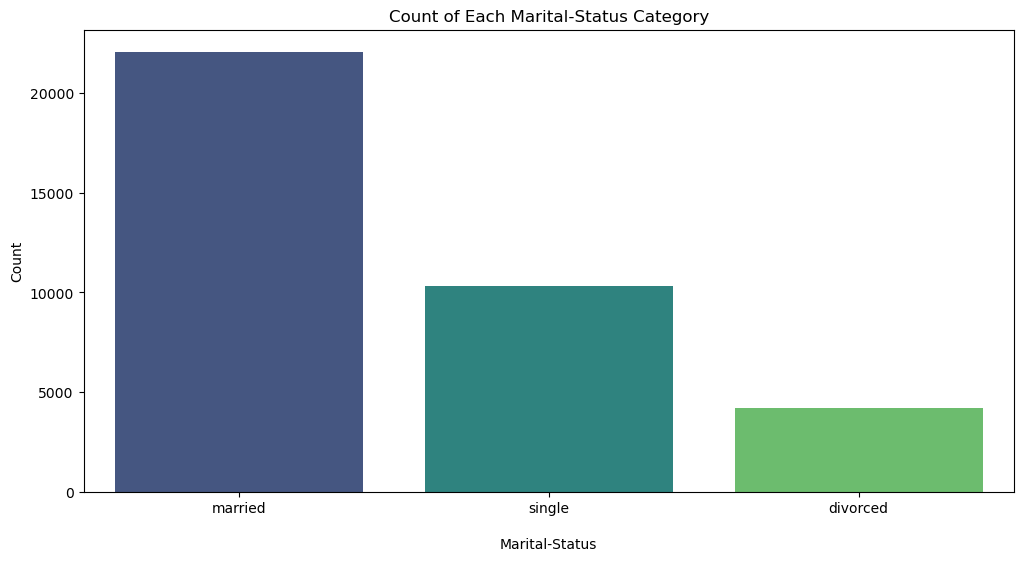

In [46]:
# Define counts
marital_counts = train_df['marital'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Marital-Status Category')
plt.xlabel('\nMarital-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

### Education Status

In [51]:
train_df['education'] = train_df['education'].replace('unknown', 'others')
test_df['education'] = test_df['education'].replace('unknown', 'others')

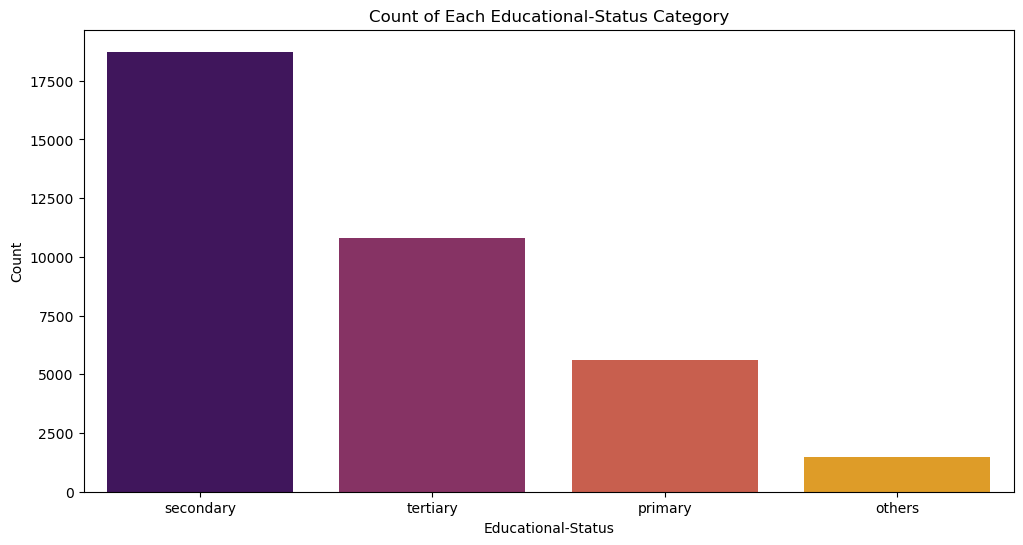

In [52]:
# Define Counts
education_counts = train_df['education'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=education_counts.index, y=education_counts.values,palette = "inferno" )

# Add labels and title
plt.title('Count of Each Educational-Status Category')
plt.xlabel('Educational-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

### Default Status
Has the customer previously paid his credit loans on time?

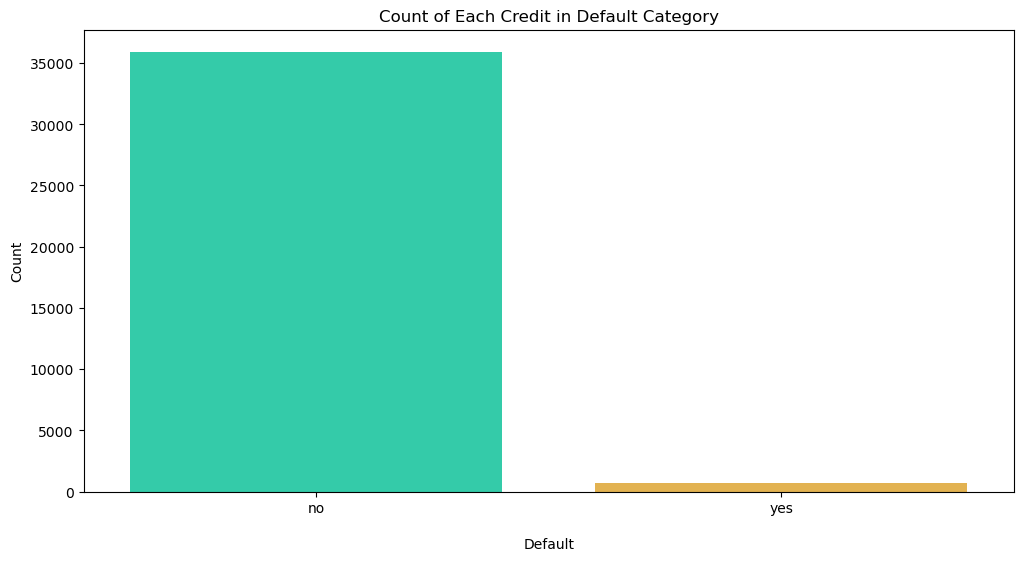

In [53]:
# Define counts
default_counts = train_df['default'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=default_counts.index, y=default_counts.values, palette='turbo')

# Add labels and title
plt.title('Count of Each Credit in Default Category')
plt.xlabel('\nDefault')
plt.ylabel('Count')

# Show the plot
plt.show()

### Balance of Customers

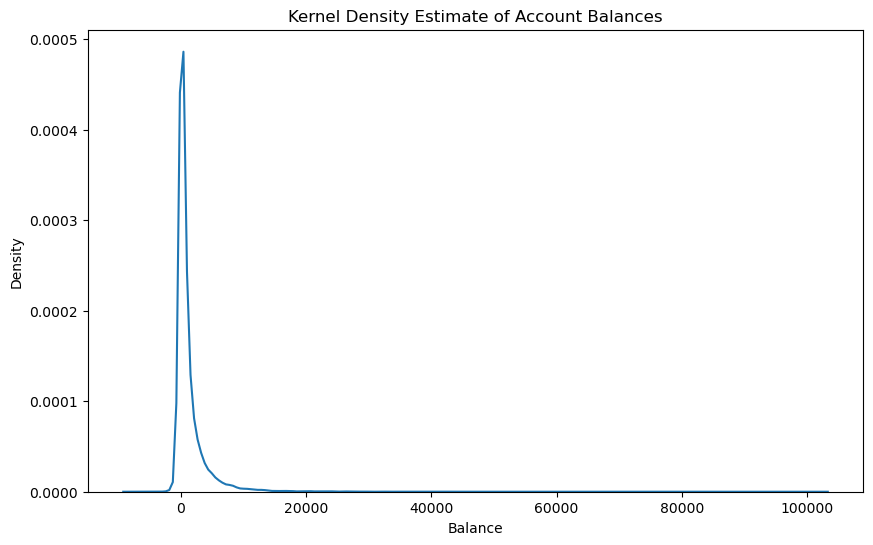

In [56]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(train_df['balance'])

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

## DATA PRE-PROCESSING

In [58]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [59]:
train_df = train_df.apply(LabelEncoder().fit_transform)
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40117,42,6,1,1,0,919,0,0,0,3,6,207,0,0,0,3,0
19332,30,0,1,2,0,1354,0,0,0,5,1,136,1,0,0,3,0
39384,21,10,1,2,0,3082,0,0,0,21,8,86,0,87,4,2,0
7286,19,0,2,2,0,3747,1,1,2,28,8,153,0,0,0,3,0
2565,28,1,0,1,0,1138,1,0,2,12,8,20,0,0,0,3,0


In [61]:
test_df = test_df.apply(LabelEncoder().fit_transform)
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
19947,15,10,1,2,0,1937,0,0,0,7,1,138,3,0,0,3,0
25163,16,0,1,2,0,655,1,0,0,17,9,348,0,0,0,3,0
44960,39,0,0,2,0,1756,1,0,1,7,10,367,1,278,3,0,1
32474,14,1,1,2,0,2035,1,0,0,16,0,69,1,0,0,3,0
29619,29,11,1,2,0,2118,1,0,0,2,3,107,2,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44744,20,4,1,3,0,718,0,0,0,8,11,214,0,114,5,2,1
44035,13,10,0,3,0,1745,0,0,0,28,6,165,1,0,0,3,1
41474,6,4,2,3,0,344,0,0,0,6,11,272,0,0,0,3,0
40370,45,6,1,2,0,1983,1,0,0,21,6,732,0,0,0,3,1


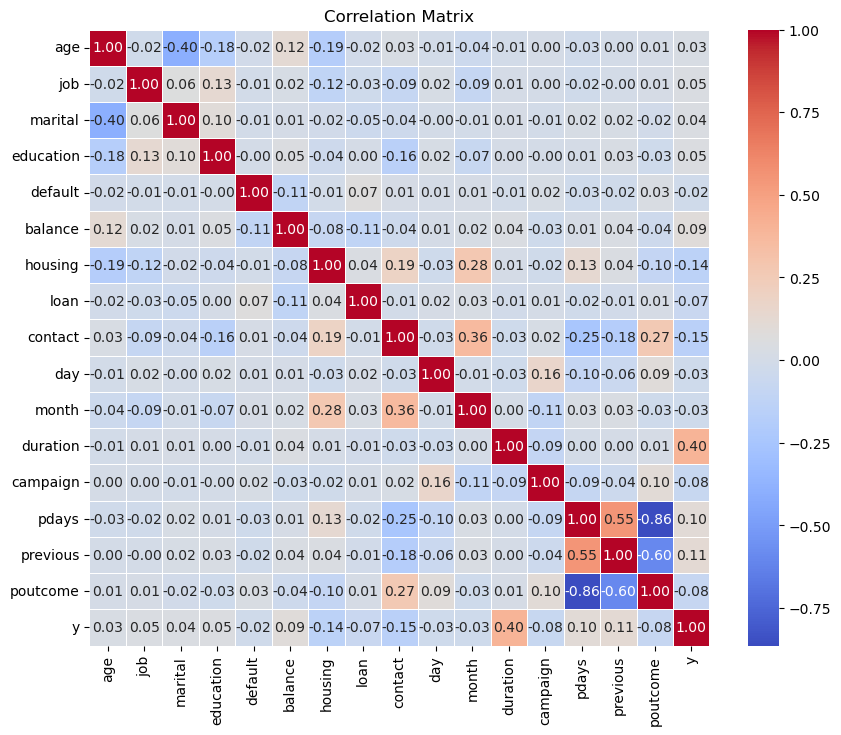

In [62]:
# Correlation matrix
correlation_matrix = train_df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()